In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df=pd.read_csv('/content/Amazonreviews.csv',nrows=267970)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.shape


(267970, 10)

In [ ]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,267970.000000,267970.000000,267970.000000,267970.000000,2.679700e+05
mean,133985.500000,1.728048,2.215763,4.173135,1.295714e+09
std,77356.420155,7.597905,8.270629,1.311018,4.787490e+07
min,1.000000,0.000000,0.000000,1.000000,9.393408e+08
25%,66993.250000,0.000000,0.000000,4.000000,1.269994e+09
50%,133985.500000,0.000000,1.000000,5.000000,1.310342e+09
75%,200977.750000,2.000000,2.000000,5.000000,1.332202e+09
max,267970.000000,866.000000,923.000000,5.000000,1.351210e+09


In [ ]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [ ]:
df.groupby('Score').std()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Time
Score,,,,
1,77342.807730,9.336209,11.184143,4.262537e+07
2,78565.546041,7.762183,8.841644,4.376216e+07
3,77995.330978,9.556461,10.715947,4.502439e+07
4,77071.494373,6.689701,7.009522,4.774732e+07
5,77237.219109,7.205317,7.536151,4.913740e+07


In [ ]:
df['word_count'] = df['Text'].apply(lambda x: len(str(x).split(" ")))
df[['Text','word_count']].head()

,Text,word_count
0,I have bought several of the Vitality canned d...,49
1,Product arrived labeled as Jumbo Salted Peanut...,31
2,This is a confection that has been around a fe...,99
3,If you are looking for the secret ingredient i...,43
4,Great taffy at a great price. There was a wid...,30


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

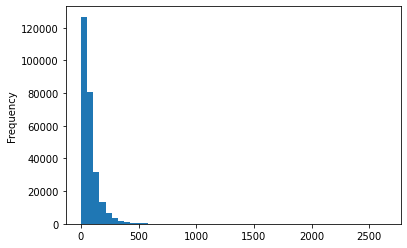

In [ ]:
df['word_count'].plot(bins=50, kind='hist')

In [ ]:
df.word_count.describe()

count    267970.000000
mean         83.275314
std          81.548291
min           3.000000
25%          35.000000
50%          59.000000
75%         102.000000
max        2640.000000
Name: word_count, dtype: float64

we have 2640 countwords

In [ ]:
df[df['word_count'] == 2640]['Text'].iloc[0]

'*********************************************************<br /> UPDATE:  READ THE UPDATE BELOW FIRST. Thanks. (June 15 and August 3, 2012)<br />*********************************************************<br />  I WAS, BUT NO MORE (actively anyway). We have four cats: two ("normals") who eat about anything, one with kidney disease (CRF/CKD) and accompanying reduced appetite, and one that has picky (and weird) tastes.  In the process of trying to find an appetite stimulant for the mom-cat (with CRF/CKD) I tried out several products on her and the others (the kids) as well.<br />Here are the results of this less than scientific (or definitive) survey:<br /><br />  Drs.Foster&Smith Shrimp Snappies Treats (ground to powder)-----------ALL REFUSED.<br />  Freeze-dried powders (Prowl and Ziwi Peak)----------------------------NO EFFECT. All but one (Ms. Picky) ate them.<br />  Seafood juices (tuna, oyster, sardine, etc.)-----------------------------NO EFFECT. All but (same) one ate them.<br />  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffbacb57b10>,
      dtype=object)

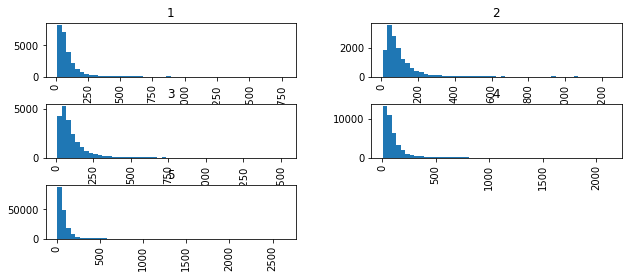

In [ ]:
df.hist(column='word_count', by='Score', bins=50,figsize=(10,4))

In [ ]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy
import numpy as np
import nltk
nltk.download('stopwords')
from nltk import FreqDist
import gensim
from gensim import corpora


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
dataset=pd.read_csv('/content/Amazonreviews.csv',nrows=10000)
dataset

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
9995,9996,B000P41A28,A3A63RACXR1XIL,"A. Boodhoo ""deaddodo""",10,15,1,1204502400,constipation,we switched from the advance similac to the or...
9996,9997,B000P41A28,A5VVRGL8JA7R,Adam,2,3,5,1306368000,Constipation Not A Problem if...,"Like the bad reviews say, the organic formula ..."
9997,9998,B000P41A28,A2TGDTJ8YCU6PD,geena77,0,0,5,1347494400,Love this formula!,I wanted to solely breastfeed but was unable t...
9998,9999,B000P41A28,AUV4GIZZE693O,"Susan Coe ""sueysis""",1,2,5,1203638400,very convenient,i love the fact that i can get this delieved t...


In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
pip install stop_words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
#To Count the frequency of words in Review column.

from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100


a = dataset['Text'].str.lower().str.cat(sep=' ')

In [25]:
b = re.sub('[^A-Za-z]+', ' ', a)

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
from nltk.corpus import stopwords

In [28]:
#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

In [29]:
from nltk import sent_tokenize, word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

In [31]:
# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

In [32]:
# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()] 

In [33]:
# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

In [ ]:
#visualization

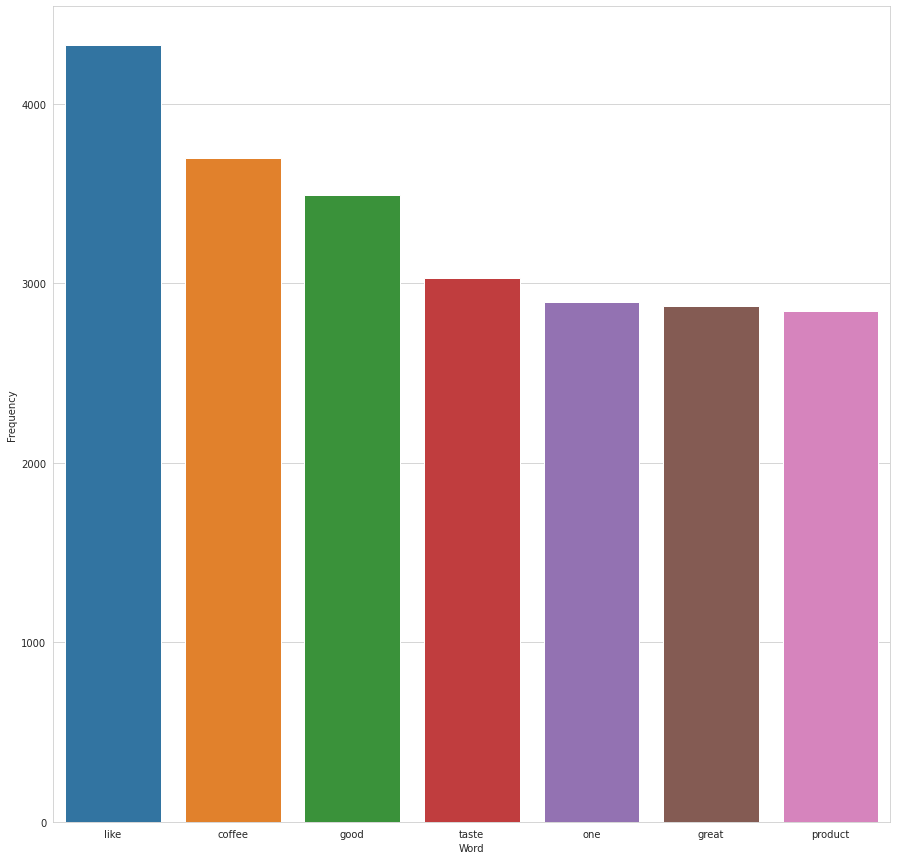

In [34]:
plt.figure(figsize=(15,15))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

In [35]:
# creating a word cloud

In [36]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

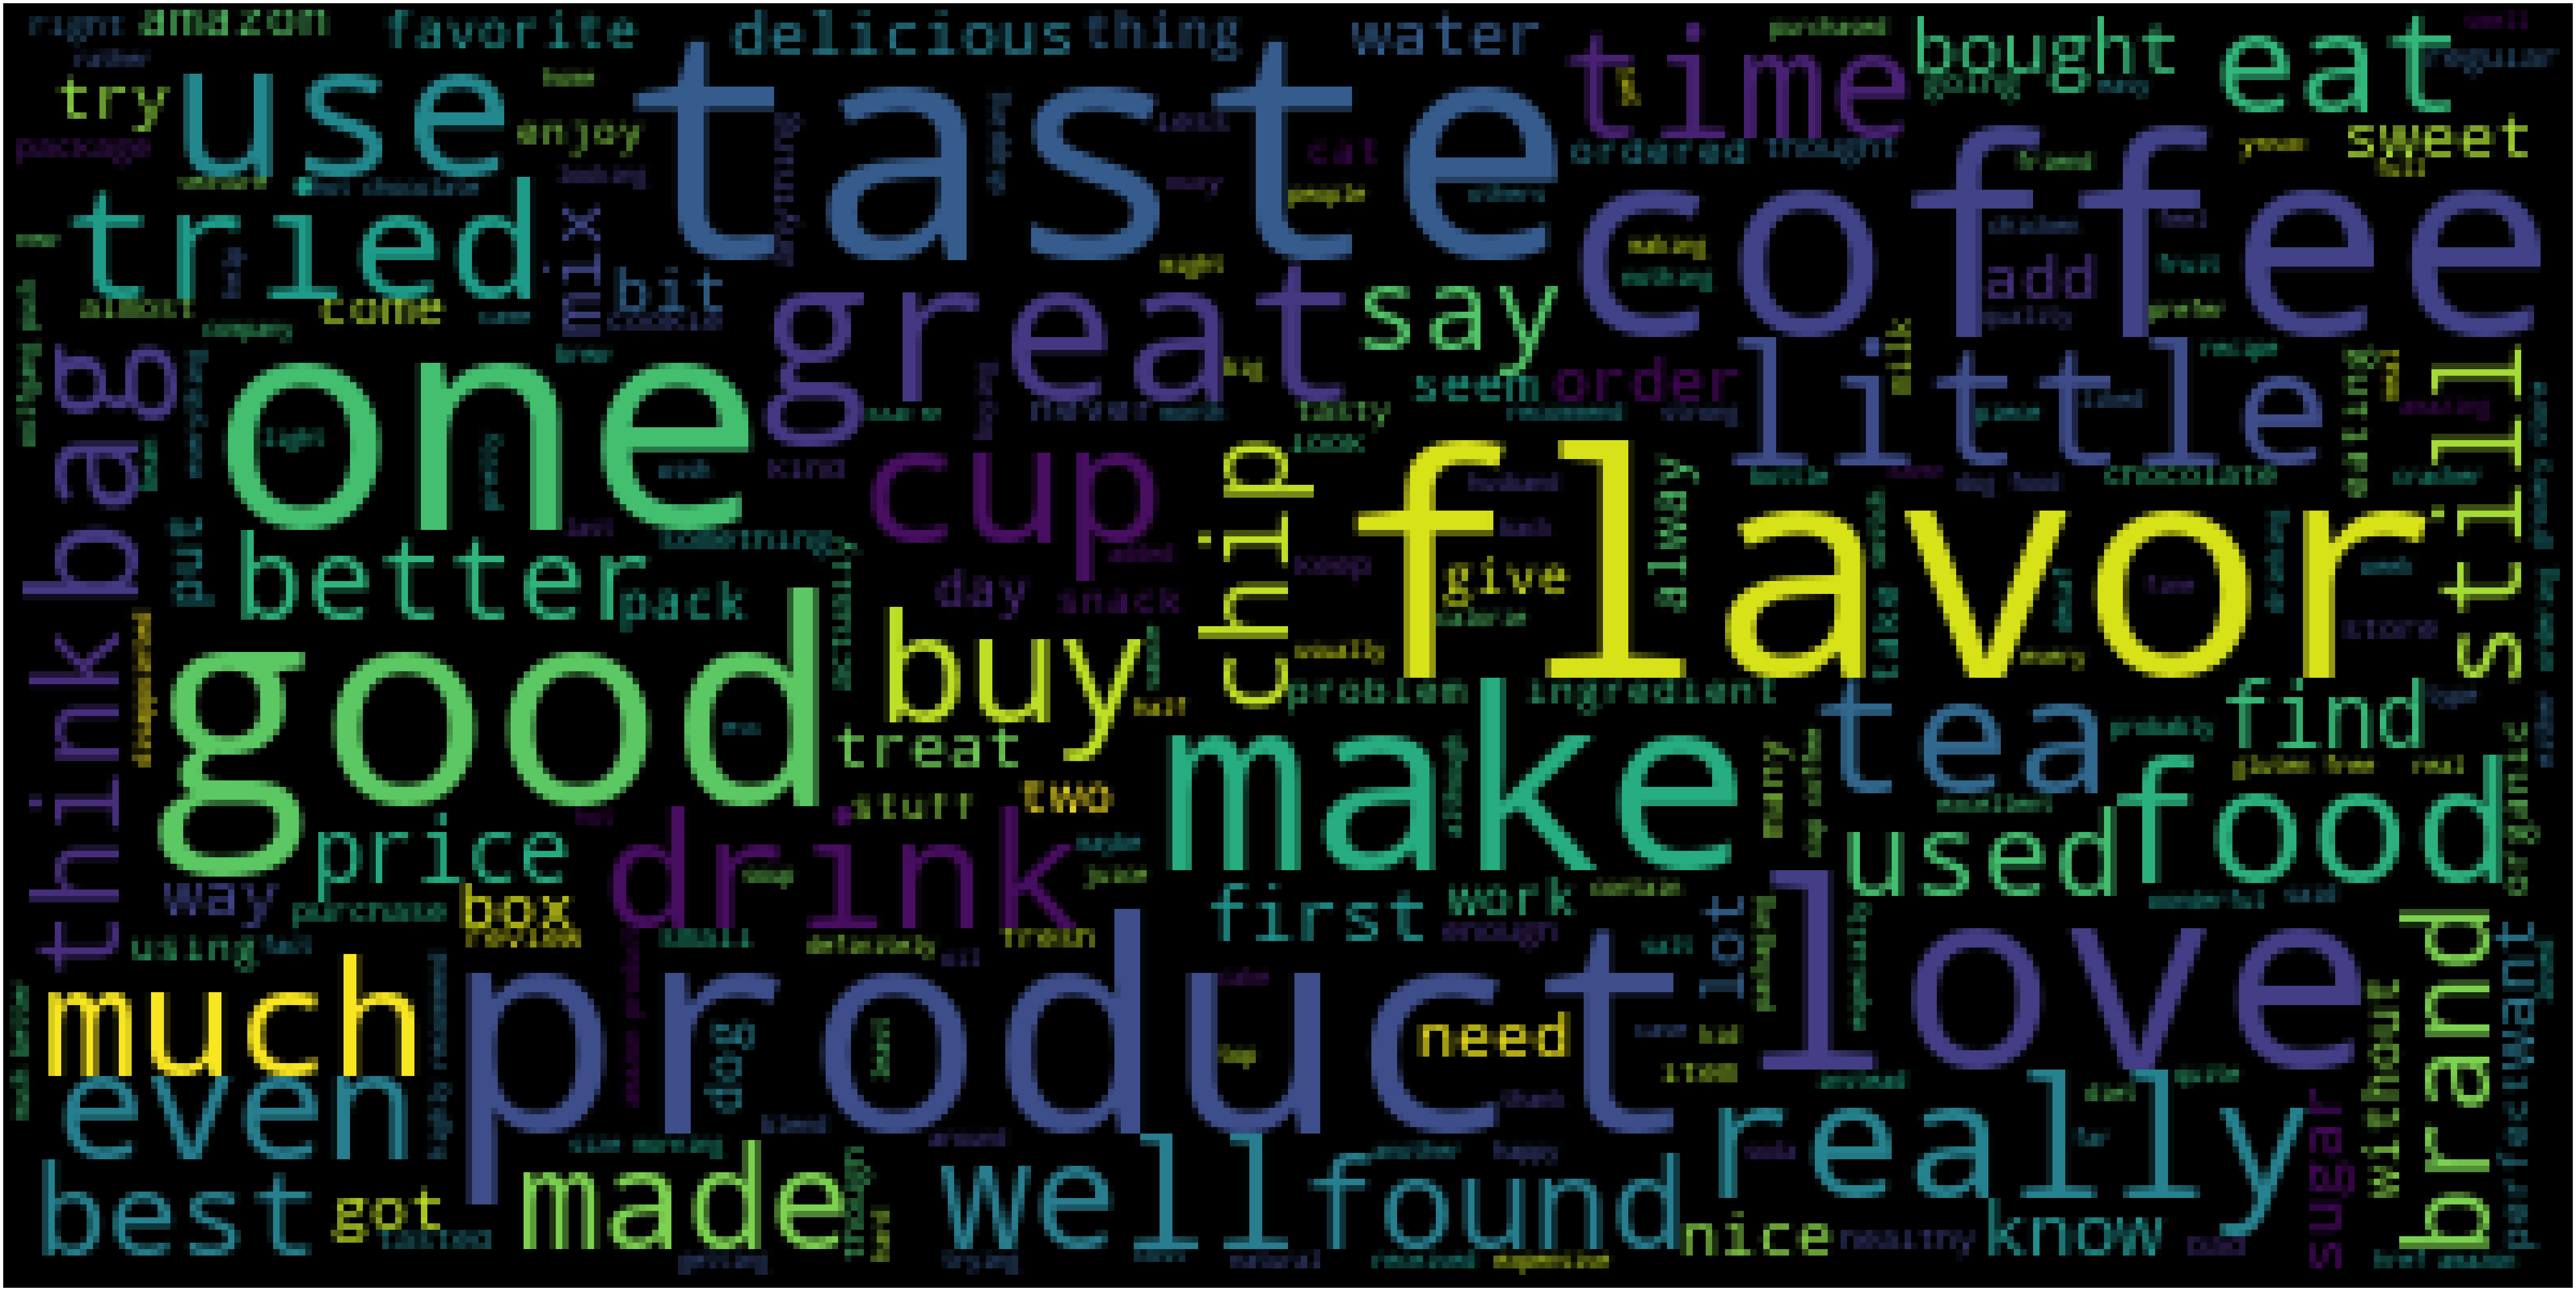

In [38]:
# WordCloud for Review Column
from wordcloud import WordCloud, STOPWORDS
wc(cleaned_data_title,'black','Common Words' )

In [9]:
#sentiment columns using Textblob

In [14]:
import pandas as pd
dataset=pd.read_csv('/content/Amazonreviews.csv',nrows=1000)
dataset

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
995,996,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


In [15]:
#Categorize the "Review " column into Positive and Negative sentiments using TextBlob

from textblob import TextBlob

bloblist_desc = list()

train_descr_str=dataset['Text'].astype(str)
for row in train_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    train_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])

In [16]:
def f(train_polarity_desc):
    if train_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif train_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

In [17]:
train_polarity_desc['Sentiment_Type'] = train_polarity_desc.apply(f, axis=1)

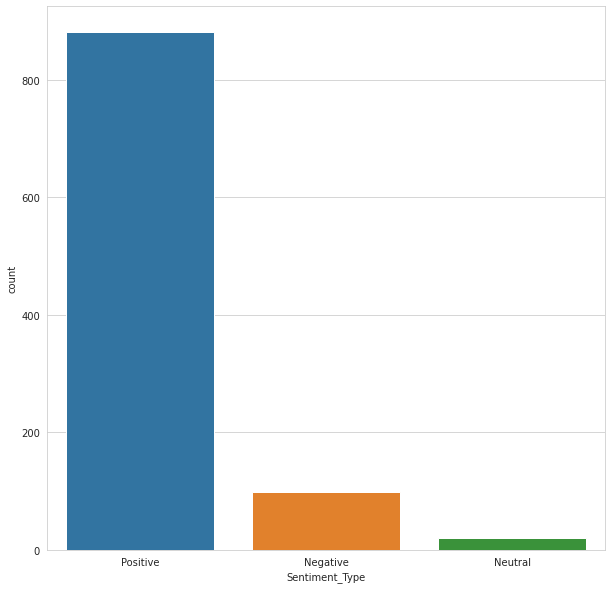

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=train_polarity_desc)